Include the upper directory to the path to access the library.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In this example, we use the Kernighan-Lin algorithm for graph partition.

In [2]:
from engines.kl import *

kl = KL(f_engine="../engines/bipartiteSBM-KL/biSBM",
        n_sweeps=2,
        is_parallel=True,
        n_cores=2,
        kl_edgelist_delimiter="\t",                        # [KL] due to the KL code accepts 1-indexed nodes by default, we used the delimiter to transform our 0-indexed input.  
        kl_steps=5,                                    
        kl_itertimes=1,
        f_kl_output="../engines/bipartiteSBM-KL/f_kl_output"  # [KL] path to the KL output dir; recommended to be in the same folder as the binary
    )

Here, we initiate the Python class for the heuristic.

In [4]:
from det_k_bisbm.optimalks import *
from det_k_bisbm.ioutils import *

edgelist = get_edgelist("../dataset/bisbm-n_1000-ka_4-kb_6-r-1.0-Ka_30-Ir_1.75.gt.edgelist", "\t")
types= kl.gen_types(500, 500)

oks = OptimalKs(kl, edgelist, types)
oks.set_params(init_ka=10, init_kb=10, i_th=0.1)
oks.set_adaptive_ratio(0.9)
oks.set_exist_bookkeeping(True)
oks.set_logging_level("info")

We could also generate a command-line string for single-point computation. 

In [5]:
kl.prepare_engine("../dataset/bisbm-n_1000-ka_4-kb_6-r-1.0-Ka_30-Ir_1.75.gt.edgelist", 500, 500, 10, 10)

'../engines/bipartiteSBM-KL/biSBM ../engines/bipartiteSBM-KL/f_kl_output/ddd8cc175fccbd2aca365b33435811a7/0410eec6b6f93929eda5eaba6e003658_1-indexed.edgelist ../engines/bipartiteSBM-KL/f_kl_output/ddd8cc175fccbd2aca365b33435811a7/0410eec6b6f93929eda5eaba6e003658.types ../engines/bipartiteSBM-KL/f_kl_output/ddd8cc175fccbd2aca365b33435811a7 10 10 1 5'

Let's start by (10, 10) and see how the heuristic finds (4, 6).

In [6]:
oks.iterator()

2017-09-30 03:21:10,744:INFO:Now computing graph partition at (10, 10) ...
2017-09-30 03:22:12,326:INFO:... DONE.
2017-09-30 03:22:12,720:INFO:Now computing graph partition at (4, 4) ...
2017-09-30 03:22:19,930:INFO:... DONE.
2017-09-30 03:22:19,931:INFO:Now computing graph partition at (3, 4) ...
2017-09-30 03:22:28,714:INFO:... DONE.
2017-09-30 03:22:28,715:INFO:Now computing graph partition at (4, 3) ...
2017-09-30 03:22:36,893:INFO:... DONE.
2017-09-30 03:22:36,893:INFO:Now computing graph partition at (3, 3) ...
2017-09-30 03:22:42,945:INFO:... DONE.
2017-09-30 03:22:42,946:INFO:check all the adjacent points near (4, 4)
2017-09-30 03:22:42,947:INFO:Now computing graph partition at (5, 4) ...
2017-09-30 03:22:51,991:INFO:... DONE.
2017-09-30 03:22:51,992:INFO:Now computing graph partition at (4, 5) ...
2017-09-30 03:23:01,335:INFO:... DONE.
2017-09-30 03:23:01,336:INFO:Now computing graph partition at (5, 3) ...
2017-09-30 03:23:12,643:INFO:... DONE.
2017-09-30 03:23:12,644:INFO:No

OrderedDict([((10, 10), -1.0634978258422689),
             ((4, 4), -1.0814345373285021),
             ((3, 4), -1.0480711705017032),
             ((4, 3), -1.0091928998700301),
             ((3, 3), -1.0170963232628358),
             ((5, 4), -1.0760455090557486),
             ((4, 5), -1.0972210570995202),
             ((5, 3), -1.0018882037327224),
             ((3, 5), -1.0580678039545808),
             ((5, 5), -1.0918665402525065),
             ((4, 6), -1.0991802202102094),
             ((3, 6), -1.0570973007063775),
             ((5, 6), -1.0936563812568603),
             ((4, 7), -1.0950585234406005),
             ((3, 7), -1.0533970845526486),
             ((5, 7), -1.0901421773298718)])

We could clean the history and re-compute the points again. Or, we could also do single-point re-computation.

In [7]:
# oks.clean()
# oks.compute_and_update(4, 6, recompute=True)

Let's plot the trace of the heuristic.

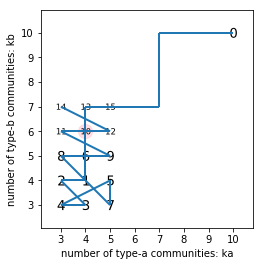

In [8]:
import matplotlib.pyplot as plt
from matplotlib import collections  as mc

trace = list(oks.trace_mb.keys())
lines = []
for ind, i in enumerate(trace):
    if ind != len(trace) - 1:
        lines += [(trace[ind], trace[ind+1])]

lc = mc.LineCollection(lines, linewidths=2)
fig, ax = plt.subplots()
ax.add_collection(lc)

# Pink circle marks the optimal point (ka, kb)
p_estimate = sorted(oks.confident_desc_len, key=oks.confident_desc_len.get)[0]
ax.scatter(p_estimate[0], p_estimate[1], marker="o", c="pink", s=200, alpha=0.5)

# Black numbers indicate ordered points where graph partition takes place
for idx, point in enumerate(oks.confident_desc_len.keys()):
    plt.scatter(point[0], point[1], marker='${}$'.format(idx), c="black", edgecolors="none", s=100)

ax.autoscale()
ax.margins(0.1)

ax.set_aspect(1)
plt.xlabel("number of type-a communities: ka")
plt.ylabel("number of type-b communities: kb")
plt.xticks(range(3, 11))
plt.yticks(range(3, 11))

plt.show()